# Aplicando filtros a imágenes

Hoy en día los filtros de imágenes son algo bastante popular, desde el filtro de perrito de Snapchat, hasta los filtros que te dicen a qué famoso te pareces.

Aunque en esta práctica no llegaremos a ese nivel de filtros, vamos a conocer los fundamentos del filtrado de imágenes y exploraremos algunos de los mas famosos de la industria y que les pudieran servir para mejorar la calidad de la imagen.

Vamos allá.

Como siempre, vamos a comenzar importando las librerías necesarias para trabajar.

In [1]:
# Importar las librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Para fines prácticos vamos a definir cada filtro en una función.

In [14]:
# Función para el filtro sal-pimienta (salt & peper)
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    total_pixels = image.size

    # Agregamos sal, ruido blanco (salt)
    num_salt = np.ceil(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = 255

    # Agregamos pimienta, ruido negro (pepper)
    num_peper = np.ceil(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_peper)) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = 0

    return noisy

# Creo que el blurring lo dejamos aparte porque son varios tipos
# Filtro de desenfoque (Blur)
# def blur(image, kernel = (5,5)):
    # blurred_image = cv2.GaussianBlur(image, kernel, 0)

# Filtro de afilado
def sharpen(image, kernel= np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])):
    sharpened_image = cv2.filter2D(image, -1, kernel)

    return sharpened_image

# Filtro de erorsión
def erode(image, kernel= np.ones((5, 5), np.uint8), iterations = 3):
    eroded_image = cv2.erode(image, kernel, iterations)

    return eroded_image

# Filtro de dilatación (lo contrario de la erosión)
def dilate(image, kernel=np.ones((5,5), np.uint8), iterations=3):
    dilated = cv2.dilate(image, kernel, iterations)
    
    return dilated

# Filtro de apertura (opening), el opening es la suma del filtro de erosión seguida de la dilatación
def opening(image, kernel=np.ones((1,1), np.uint8)):
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    return opened_image

En esta función definimos el ruido sal-pimienta (*salt & pepper*), que aunque si se trata de un filtro, es más un herramienta para añadir ruido a la imagen de una manera aleatoria.

In [15]:
# Cargar la imagen desde disco y pasarla a escala de grises
# path = 'C:\Users\theki\Documents\Codes\ICASAT2025_CVCourse\Practicas\Filtering\peppers.jpg' # ruta a la imagen desde su computadora
path = 'peppers.jpg'
image = cv2.imread(path, cv2.IMREAD_UNCHANGED)

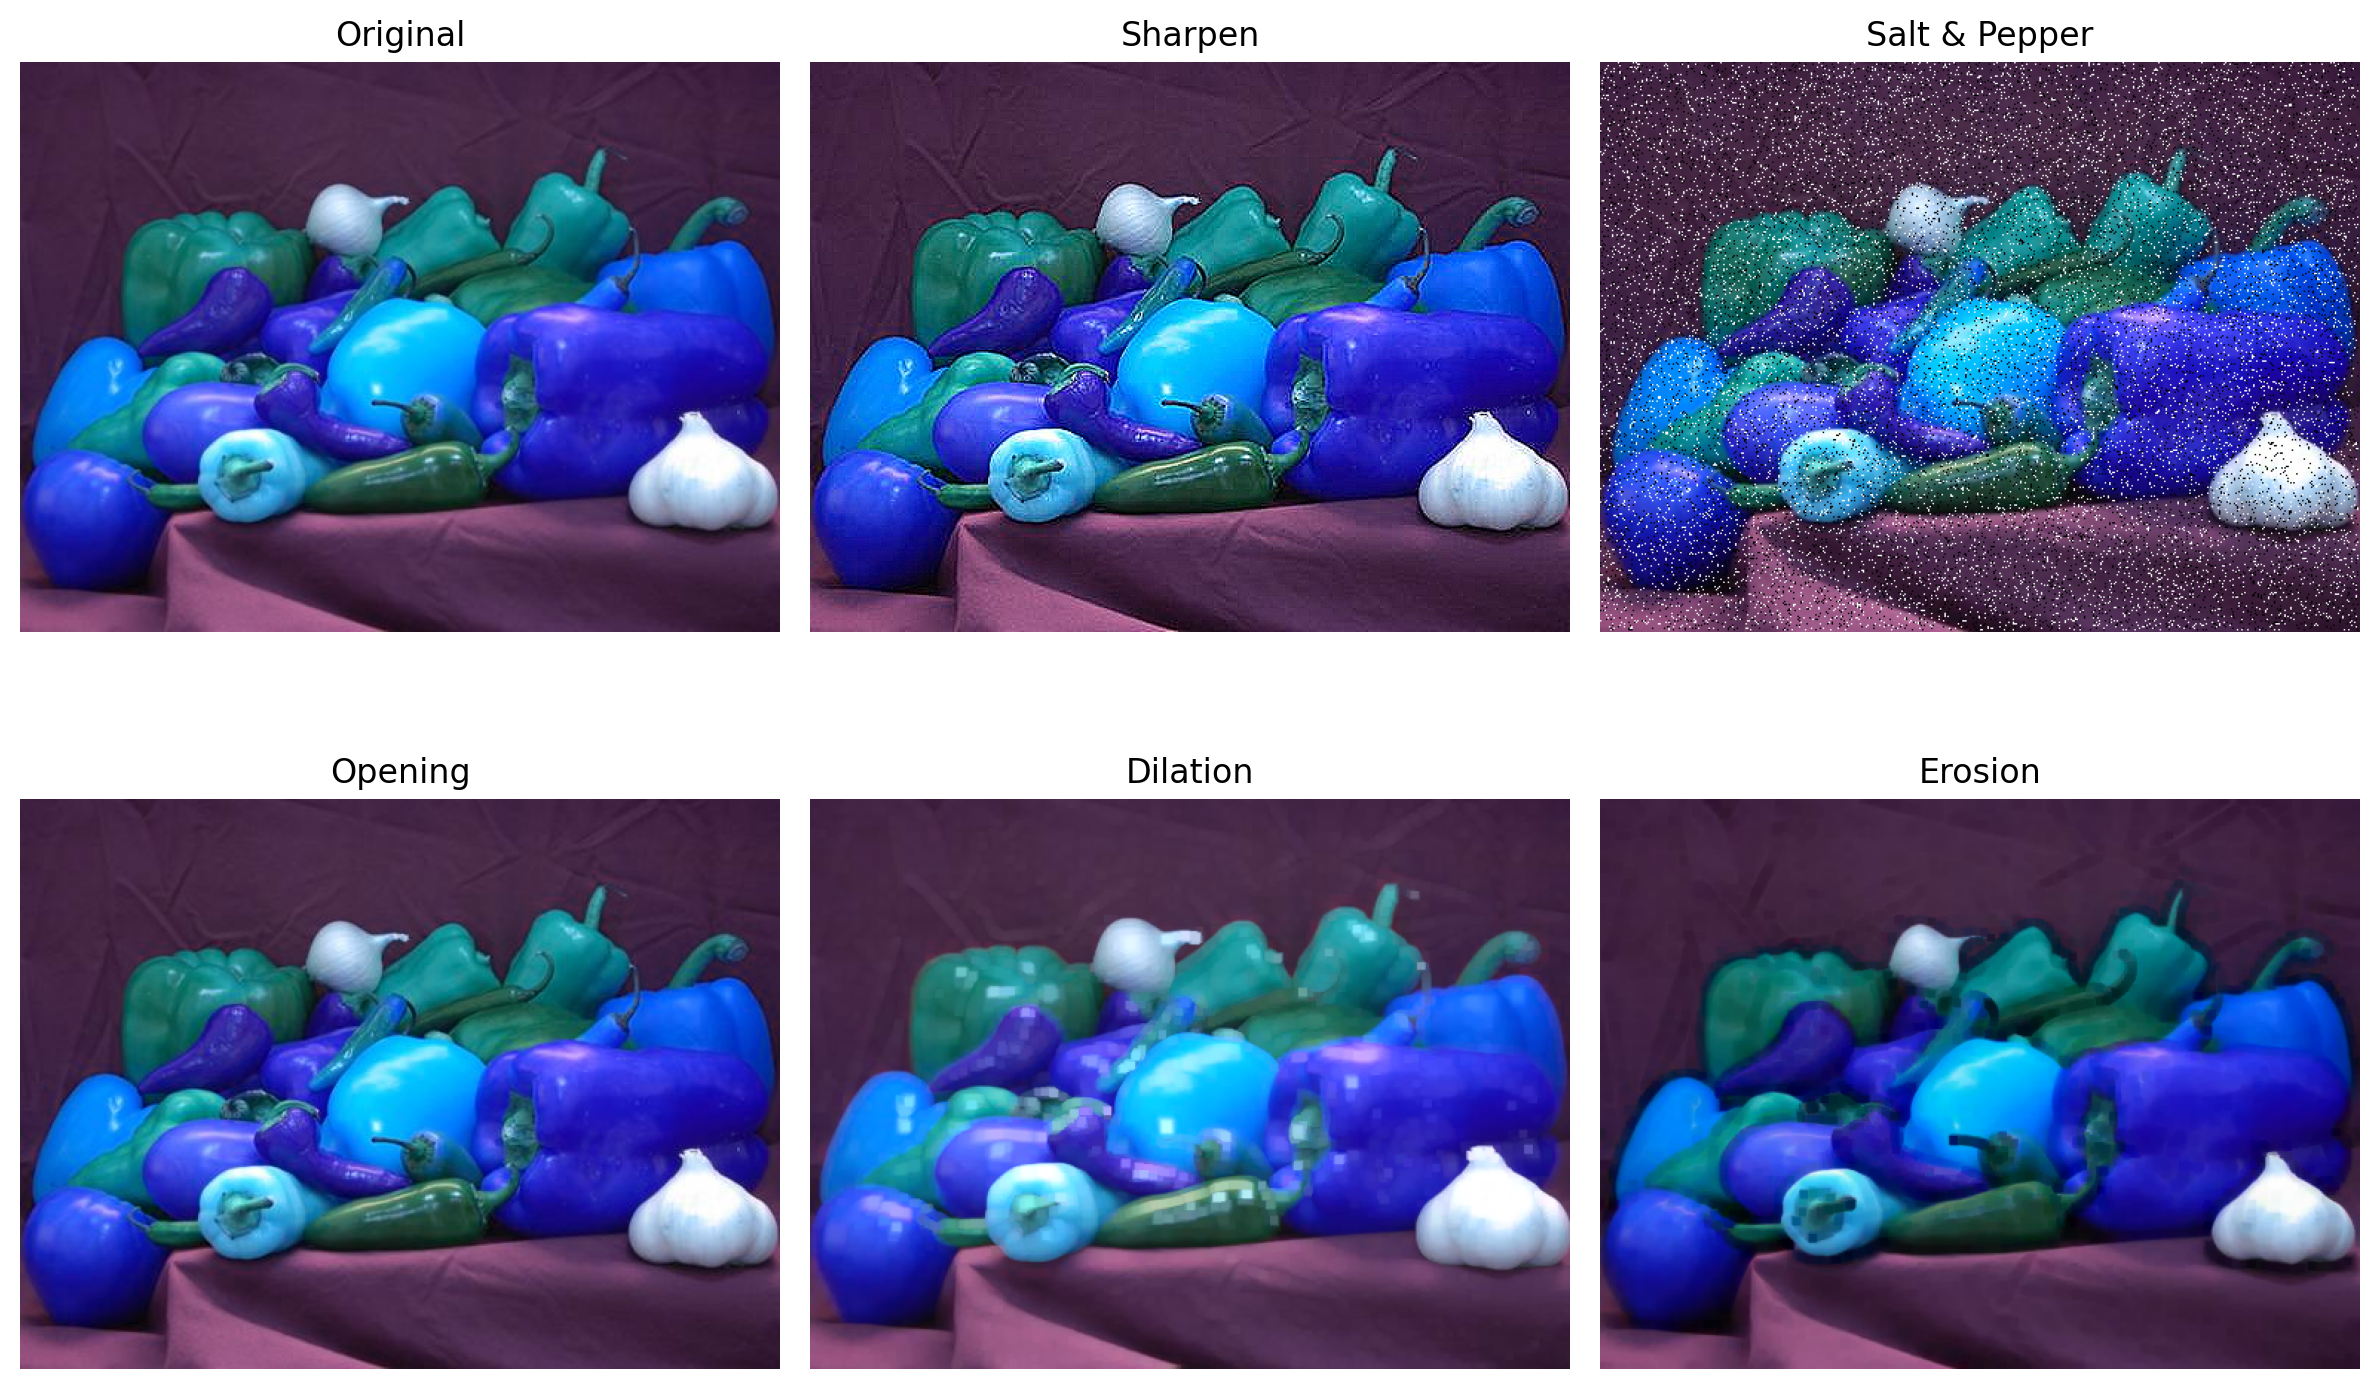

In [16]:
# Aplicamos los filtros a la misma imagen y graficamos original vs filtros
sharpened = sharpen(image) # afilado
dilated = dilate(image) # dilatación
eroded = erode(image) # erosión
opened = opening(image) # apertura
noisy = add_salt_pepper_noise(image, 0.02, 0.02) # sal-pimienta

titles = ['Original', 'Sharpen', 'Salt & Pepper', 'Opening', 'Dilation', 'Erosion'] # Titulos para la grafica
images = [image, sharpened, noisy, opened, dilated, eroded]

# Definir figura en plt
plt.figure(figsize=(12, 8), dpi=200, facecolor='white')
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()